In [1]:
# 데이터 시각화의 기본

# 원문 : 대시보드 설계와 데이터 시각화 도입부

In [2]:

import pandas as pd

group_a = {"x": pd.Series([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]),
           "y": pd.Series([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]), "group": "group_a"}

group_b = {"x": pd.Series([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]),
           "y": pd.Series([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]), "group": "group_b"};

group_c = {"x": pd.Series([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]),
           "y": pd.Series([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]), "group": "group_c"}

group_d = {"x": pd.Series([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]),
           "y": pd.Series([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]), "group": "group_d"}

df1 = pd.DataFrame(group_a).reset_index().set_index(["group", "index"])
df2 = pd.DataFrame(group_b).reset_index().set_index(["group", "index"])
df3 = pd.DataFrame(group_c).reset_index().set_index(["group", "index"])
df4 = pd.DataFrame(group_d).reset_index().set_index(["group", "index"])

df = pd.concat([df1, df2, df3, df4])
df.groupby("group").agg(["mean", "std"])

x                   y          
        mean       std      mean       std
group                                     
group_a  9.0  3.316625  7.500909  2.031568
group_b  9.0  3.316625  7.500909  2.031657
group_c  9.0  3.316625  7.500000  2.030424
group_d  9.0  3.316625  7.500909  2.030579

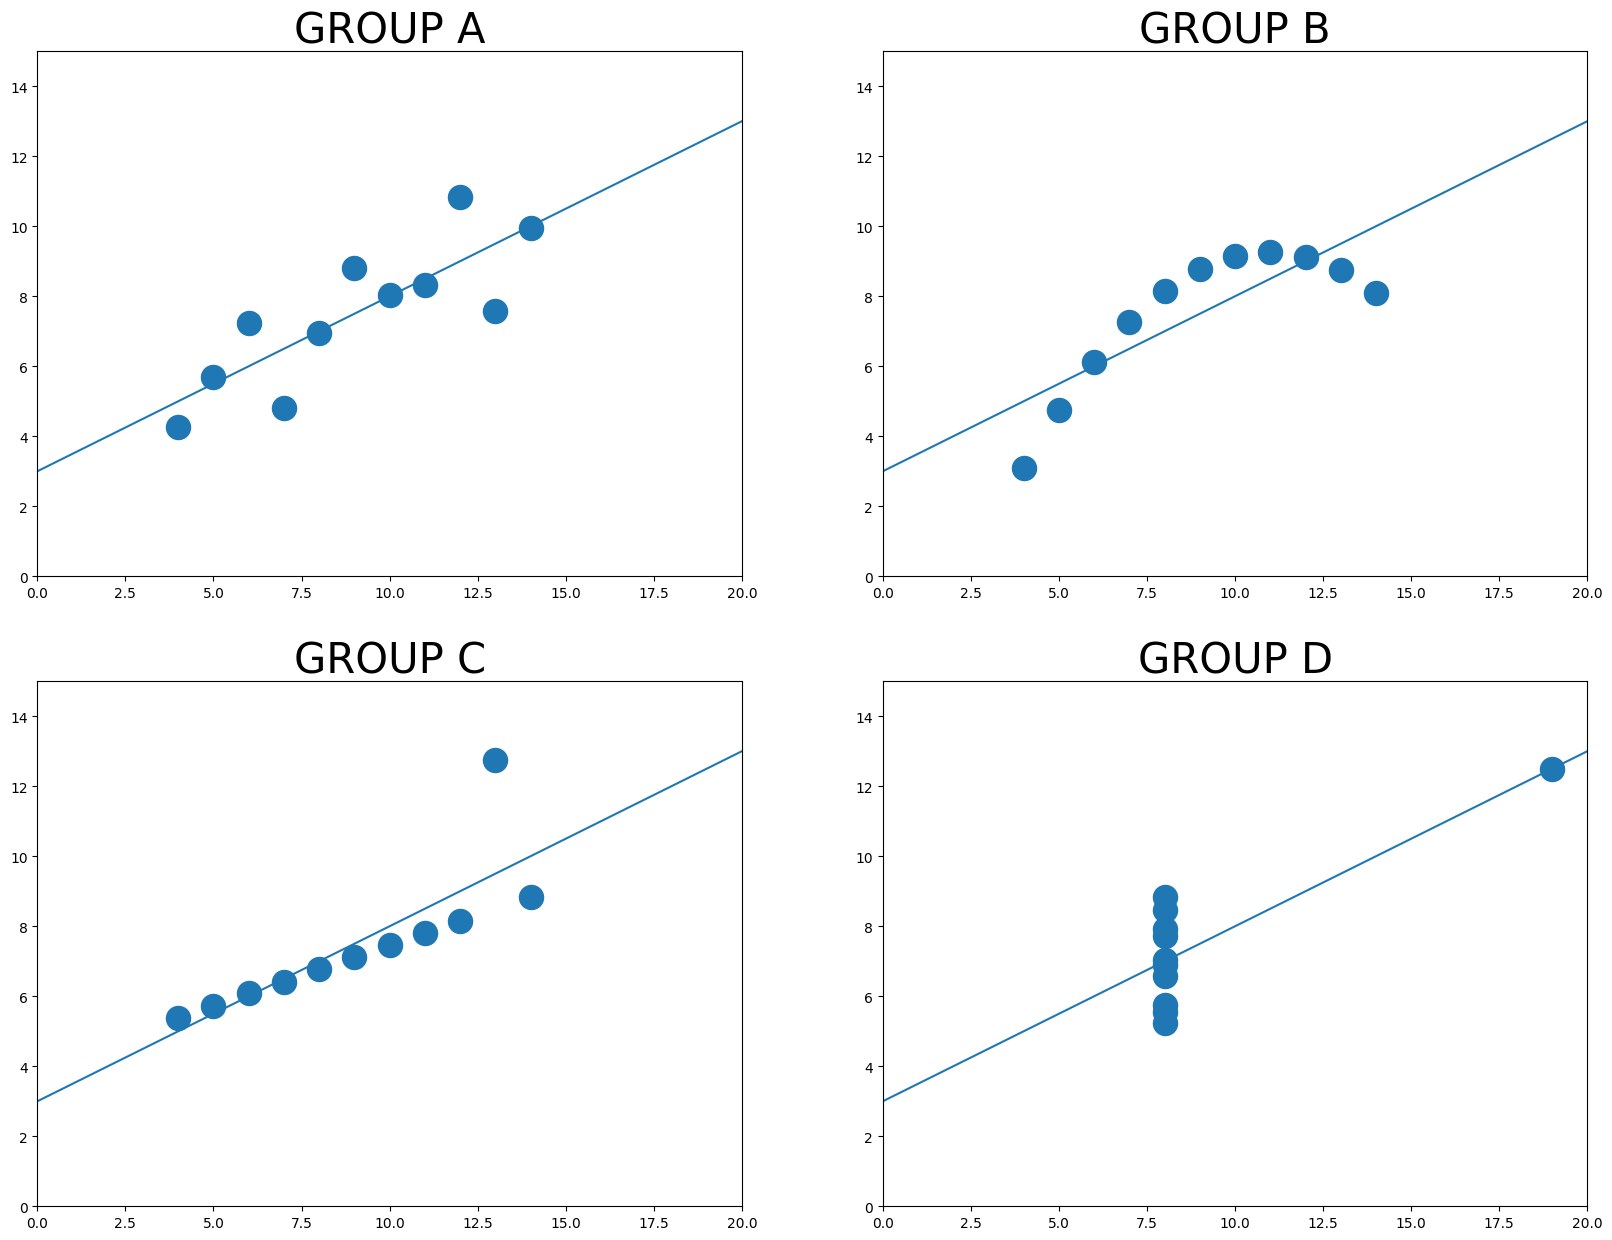

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


def lin_reg(x, y):
    x = np.array(df1.x).astype(float).reshape((11, -1))
    y = np.array(df1.y).reshape((11, -1))
    model = LinearRegression()
    model.fit(x, y)
    x_new = np.linspace(0, 20, 10)
    y_new = model.predict(x_new[:, np.newaxis])
    return x_new, y_new


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for i in ax:
    for j in i:
        j.set_xlim(0, 20)
        j.set_ylim(0, 15)

ax[0][0].set_title("GROUP A", fontdict={"fontsize": 30})
ax[0][1].set_title("GROUP B", fontdict={"fontsize": 30})
ax[1][0].set_title("GROUP C", fontdict={"fontsize": 30})
ax[1][1].set_title("GROUP D", fontdict={"fontsize": 30})

ax[0][0].scatter(df1.x, df1.y, s=300)
ax[0][0].plot(*lin_reg(df1.x, df1.y))
ax[0][1].scatter(df2.x, df2.y, s=300)
ax[0][1].plot(*lin_reg(df2.x, df2.y))
ax[1][0].scatter(df3.x, df3.y, s=300)
ax[1][0].plot(*lin_reg(df3.x, df3.y))
ax[1][1].scatter(df4.x, df4.y, s=300)
ax[1][1].plot(*lin_reg(df4.x, df4.y))

In [4]:
# 인간의 단기 기억은
# 정보의 여러 조각을 저장하게 설계되어 있지 않다.

In [5]:
%pip install koreanize_matplotlib

                                              0.0/7.9 MB ? eta -:--:--
     --                                       0.5/7.9 MB 15.2 MB/s eta 0:00:01
     ----                                     1.0/7.9 MB 12.1 MB/s eta 0:00:01
     -------                                  1.4/7.9 MB 11.3 MB/s eta 0:00:01
     ---------                                1.9/7.9 MB 12.1 MB/s eta 0:00:01
     -----------                              2.4/7.9 MB 11.7 MB/s eta 0:00:01
     --------------                           2.9/7.9 MB 12.2 MB/s eta 0:00:01
     ---------------                          3.1/7.9 MB 11.1 MB/s eta 0:00:01
     ----------------                         3.3/7.9 MB 10.1 MB/s eta 0:00:01
     -----------------                        3.5/7.9 MB 9.6 MB/s eta 0:00:01
     ------------------                       3.7/7.9 MB 9.0 MB/s eta 0:00:01
     -------------------                      3.8/7.9 MB 8.7 MB/s eta 0:00:01
     --------------------                     4.0/7.9 MB 8.3 MB

In [6]:

import numpy as np

In [33]:
# generate data : 월평균 주가

# 월
m2020 = ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10",
         "2020-11", "2020-12"]  # x축 레이블로 사용

# 삼성전자 월평균 주가
sec = [
    58_842, 58_988, 50_357, 49_086, 49_086, 52_968, 54_828, 57_170, 58_176, 59_787, 63_255, 73_343
]

# 카카오 월평균 주가
kakao = [
    32_640, 35_182, 31_920, 33_615, 45_613, 52_834, 64_459, 74_602, 75_905, 71_392, 72_355, 75_260
]
# LG전자 월평균 주가
lge = [
    68_860, 65_820, 52_949, 52_748, 56_216, 65_089, 70_857, 84_090, 89_524, 90_789, 87_202, 99_738
]
# 현대자동차 월평균 주가
hdm = [
    119_700, 128_012, 91_800, 93_258, 94_808, 103_291, 111_326, 158_588, 176_226, 173_697, 176_762, 189_095
]

In [9]:
import pickle as pk

a = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
with open("a_list.pickle", "wb") as f:
    pk.dump(a, f)

In [12]:
del a

In [14]:
with open("a_list.pickle", "rb") as f:
    a = pk.load(f)

In [15]:
a

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# 주식데이터 받아오는 간단한 방법

In [52]:
%pip install pandas_datareader == 0.9.0
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

                                              0.0/107.5 kB ? eta -:--:--
     -------------------------------------- 107.5/107.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pandas_datareader
    Found existing installation: pandas-datareader 0.10.0
    Uninstalling pandas-datareader-0.10.0:
      Successfully uninstalled pandas-datareader-0.10.0
Note: you may need to restart the kernel to use updated packages.


In [53]:
def download_stock_data(file_name, company_code, year1, month1, date1, year2, month2, date2):
    start = datetime.datetime(year1, month1, date1)
    end = datetime.datetime(year2, month2, date2)
    df = web.DataReader(f"{company_code}", "yahoo", start, end)
    df.to_pickle(file_name)
    return df

In [54]:
def load_stock_data(file_name):
    df = pd.read_pickle(file_name)
    return df

In [55]:
df_kakao = download_stock_data("kakao.data", "035720", 2015, 1, 1, 2015, 12, 31)

TypeError: string indices must be integers, not 'str'

In [32]:
df_kakao.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,15634.128906,15432.658203,15593.834961,15452.805664,710475.0,15388.613281
2017-01-03,16117.659180,15513.247070,15553.541016,16117.659180,2209650.0,16050.706055
2017-01-04,17145.160156,16178.100586,16198.247070,16983.982422,6077284.0,16913.429688
2017-01-05,17326.482422,16923.541016,17125.011719,16923.541016,3036237.0,16853.238281
2017-01-06,17024.277344,16560.894531,17004.130859,16863.101562,2039402.0,16793.050781


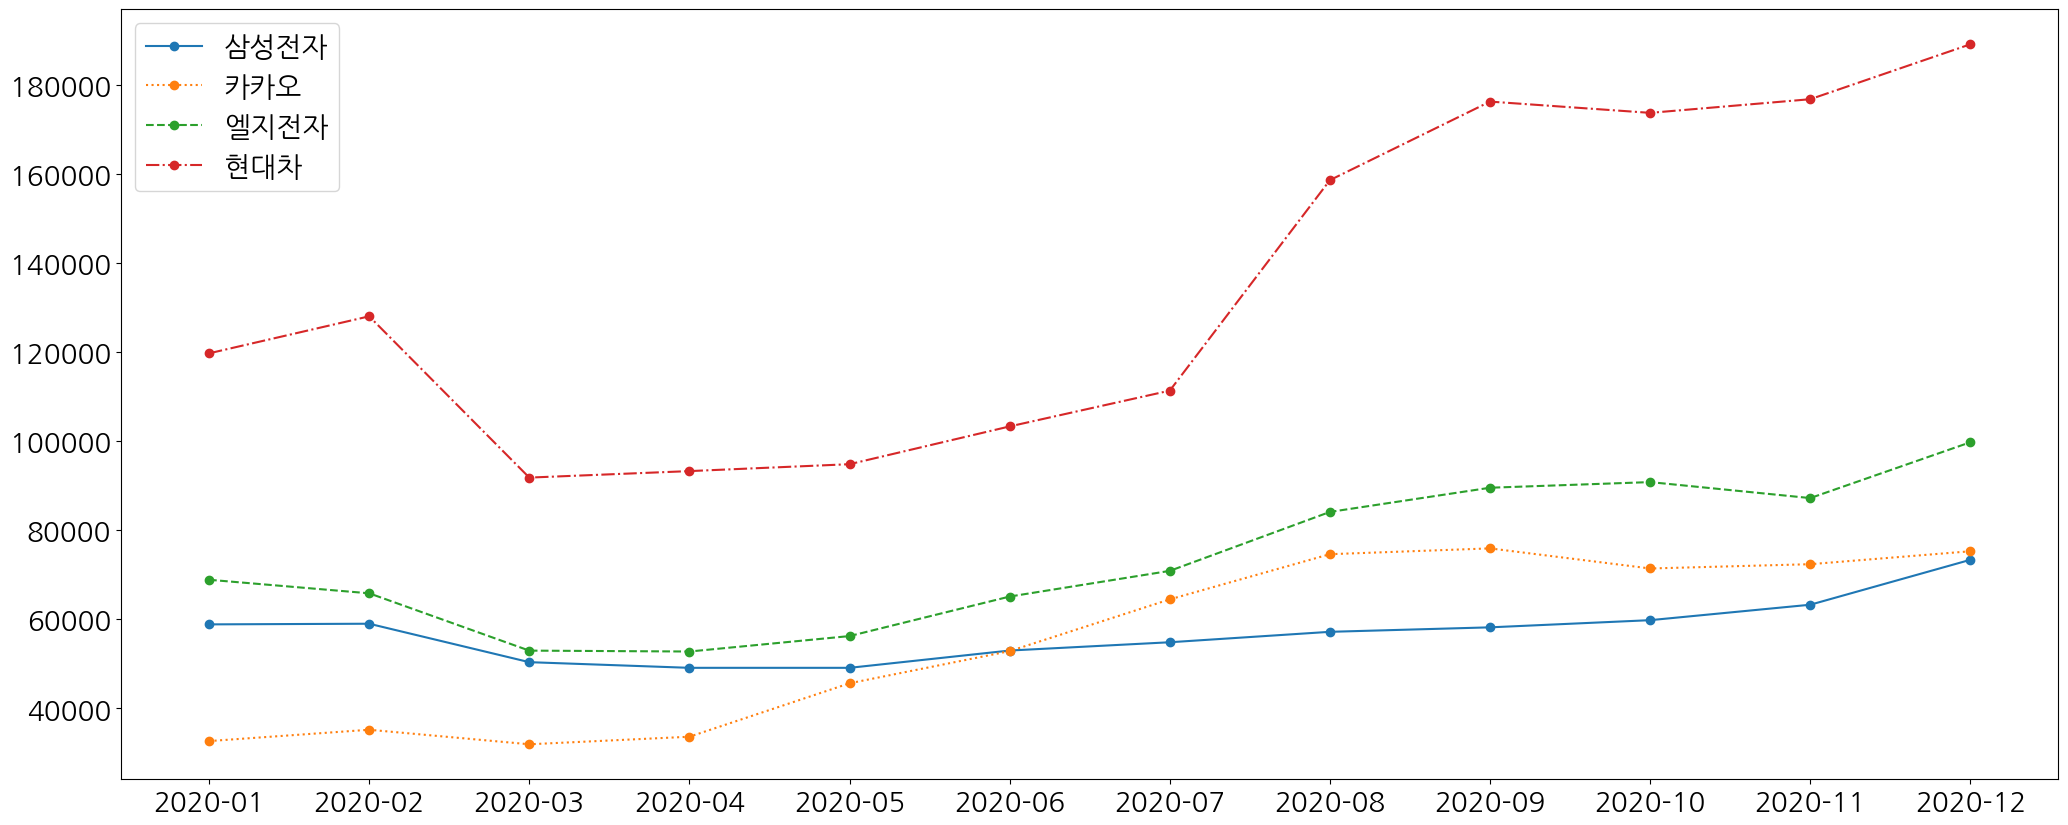

In [71]:
plt.figure(figsize=(25, 10))
plt.rcParams.update({'font.size': 20})
plt.plot(m2020, sec, "o-", label="삼성전자")
plt.plot(m2020, kakao, "o:", label="카카오")
plt.plot(m2020, lge, "o--", label="엘지전자")
plt.plot(m2020, hdm, "o-.", label="현대차")
plt.legend()

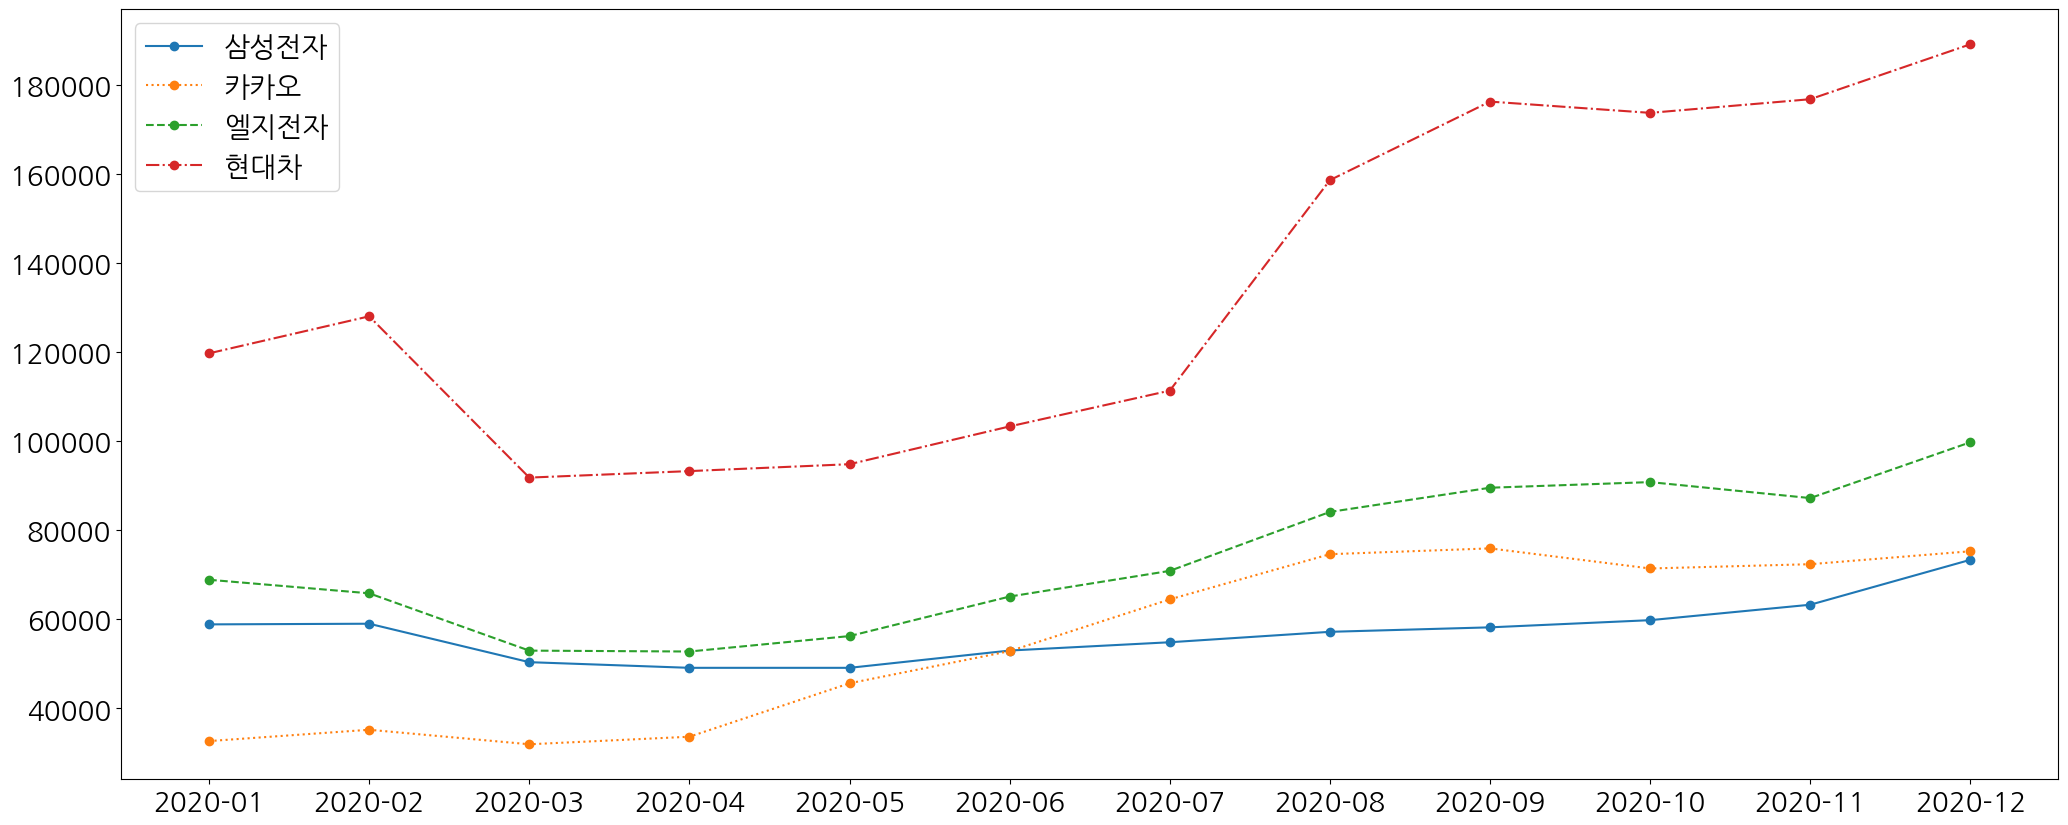

In [72]:
fig, ax = plt.subplots(figsize=(25, 10))
# plt.rcParams.update({'font.size': 20})
ax.plot(m2020, sec, "o-", label="삼성전자")
ax.plot(m2020, kakao, "o:", label="카카오")
ax.plot(m2020, lge, "o--", label="엘지전자")
ax.plot(m2020, hdm, "o-.", label="현대차")
ax.legend()

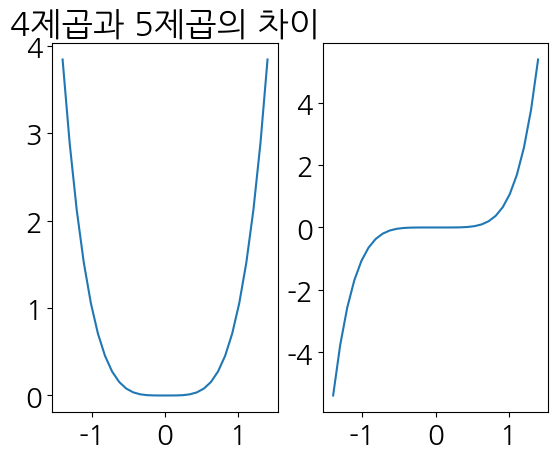

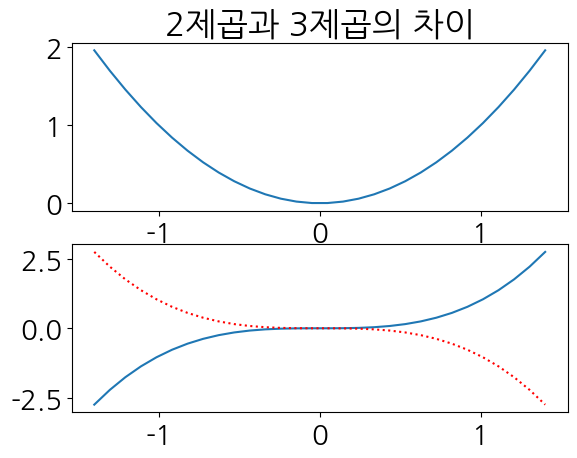

In [76]:
#  상태기반 플로팅 State-based

# -1.4부터 1.4까지 30개 구간으로 나눠서 해당 구간의 숫자를 아래 리스트에 넣어라.
# x = [-1.4, -1.303, -1.207...]
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)  # 첫 번째 도화지 생성해
plt.subplot(211)  # 2행1열의 그리드를 잡고, 첫 번째 칸(1)에 그리겠다.
plt.plot(x, x ** 2)
plt.title("2제곱과 3제곱의 차이")
plt.subplot(212)  # 2행1열의 그리드를 잡고, 두 번째 칸(2)에 그리겠다.
plt.plot(x, x ** 3)

plt.figure(2)
plt.subplot(121)  # 1행2열의 그리드를 잡고, 첫 번째 칸(1)에 그리겠다.
plt.plot(x, x ** 4)
plt.title("4제곱과 5제곱의 차이")
plt.subplot(122)  # 1행2열의 그리드를 잡고, 두 번째 칸(2)에 그리겠다.
plt.plot(x, x ** 5)

plt.figure(1)
plt.plot(x, -x ** 3, "r:")

plt.show()

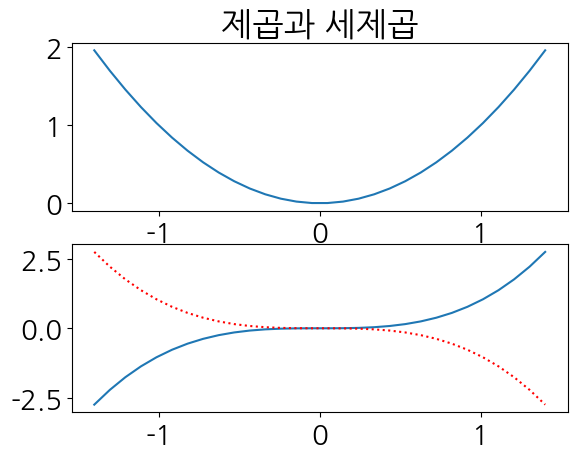

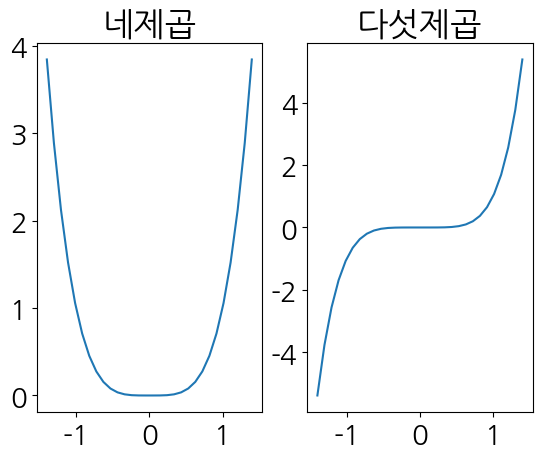

In [79]:
# 객체기반 플로팅 object-oriented

x = np.linspace(-1.4, 1.4, 30)
fig1, ax1 = plt.subplots(nrows=2, ncols=1)
ax1[0].plot(x, x**2)
ax1[0].set_title("제곱과 세제곱")
ax1[1].plot(x, x**3)

fig2, ax2 = plt.subplots(nrows=1, ncols=2)
ax2[0].plot(x, x**4)
ax2[0].set_title("네제곱")
ax2[1].plot(x, x**5)
ax2[1].set_title("다섯제곱")

ax1[1].plot(x, -x**3, "r:")

plt.show()

In [88]:
# sec
# lge
# kakao
# hdm

sec_rate = np.array(sec) / sec[0] - 1
lge_rate = np.array(lge) / lge[0] - 1
kakao_rate = np.array(kakao) / kakao[0] - 1
hdm_rate = np.array(hdm) / hdm[0] - 1

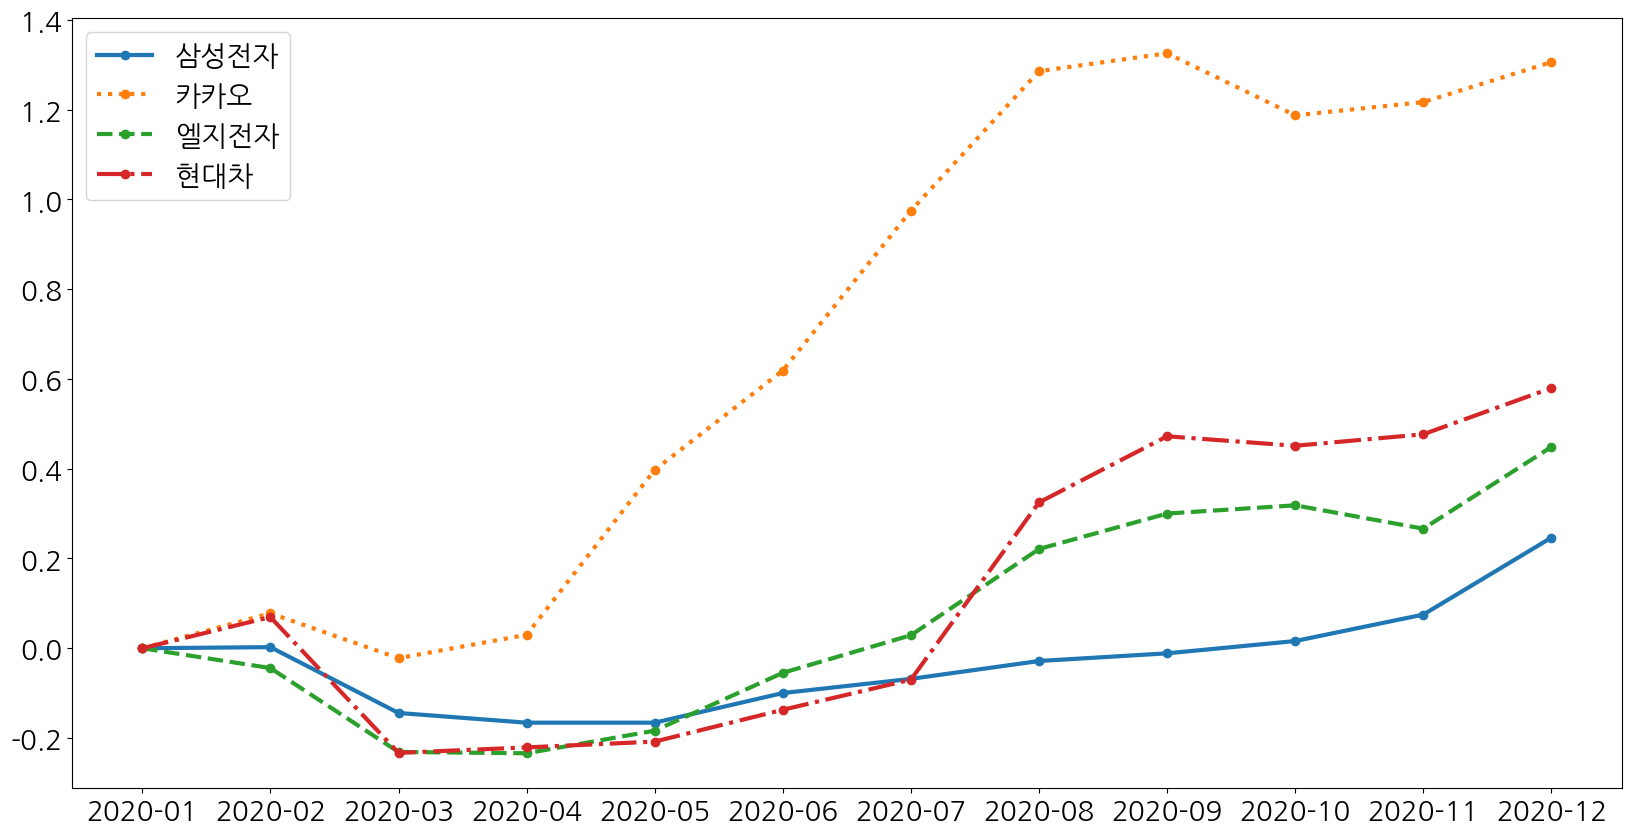

In [94]:
line_weight =3
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(m2020, sec_rate, "o-", label="삼성전자", lw=line_weight)
ax.plot(m2020, kakao_rate, "o:", label="카카오", lw=line_weight)
ax.plot(m2020, lge_rate, "o--", label="엘지전자", lw=line_weight)
ax.plot(m2020, hdm_rate, "o-.", label="현대차", lw=line_weight)
ax.legend()

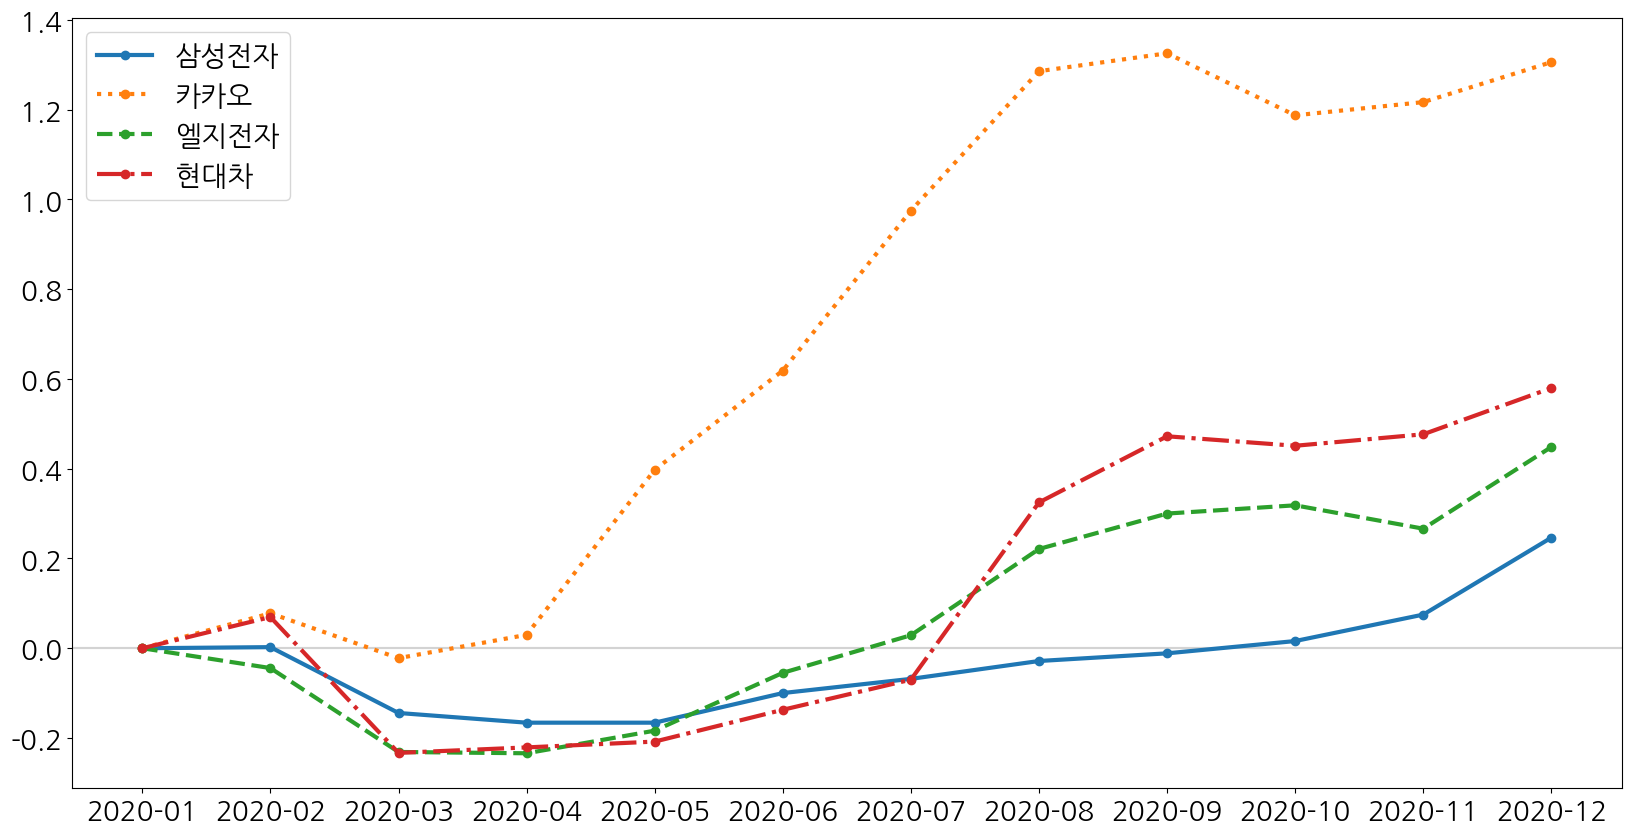

In [96]:
ax.axhline(y=0, c="lightgray", zorder=0)
display(fig)

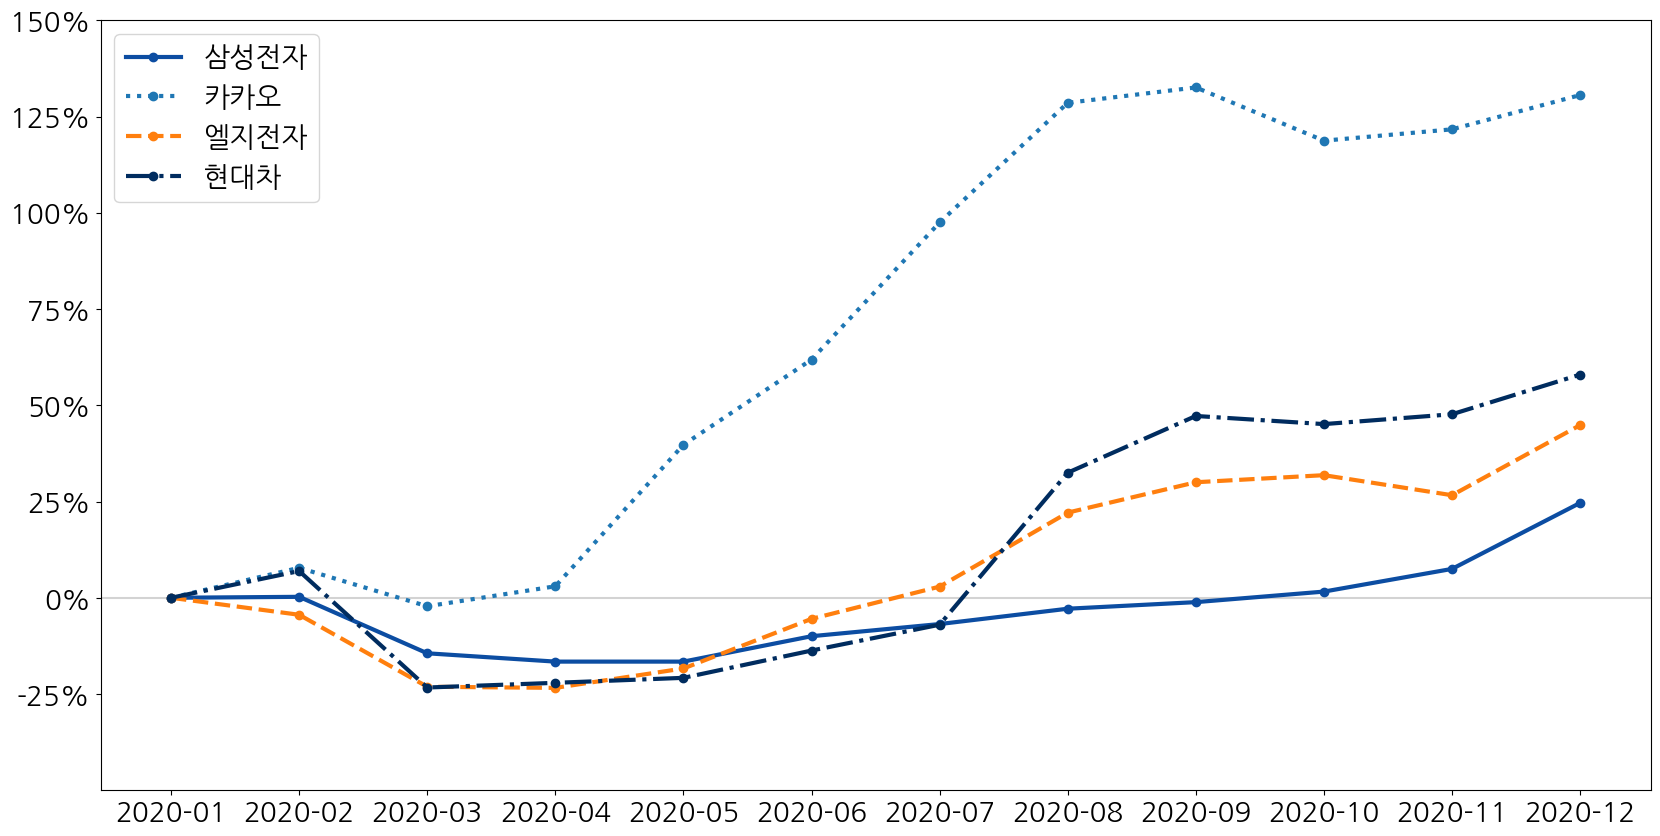

In [128]:
line_weight =3
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(m2020, sec_rate, "o-", label="삼성전자", lw=line_weight)
ax.plot(m2020, kakao_rate, "o:", label="카카오", lw=line_weight)
ax.plot(m2020, lge_rate, "o--", label="엘지전자", lw=line_weight)
ax.plot(m2020, hdm_rate, "o-.", label="현대차", lw=line_weight)

ax.axhline(y=0, c="lightgray", zorder=0)
yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y * 100:.0f}%" for y in yticks])
ax.set_ylim(-0.5,)
ax.legend()
# display(fig)

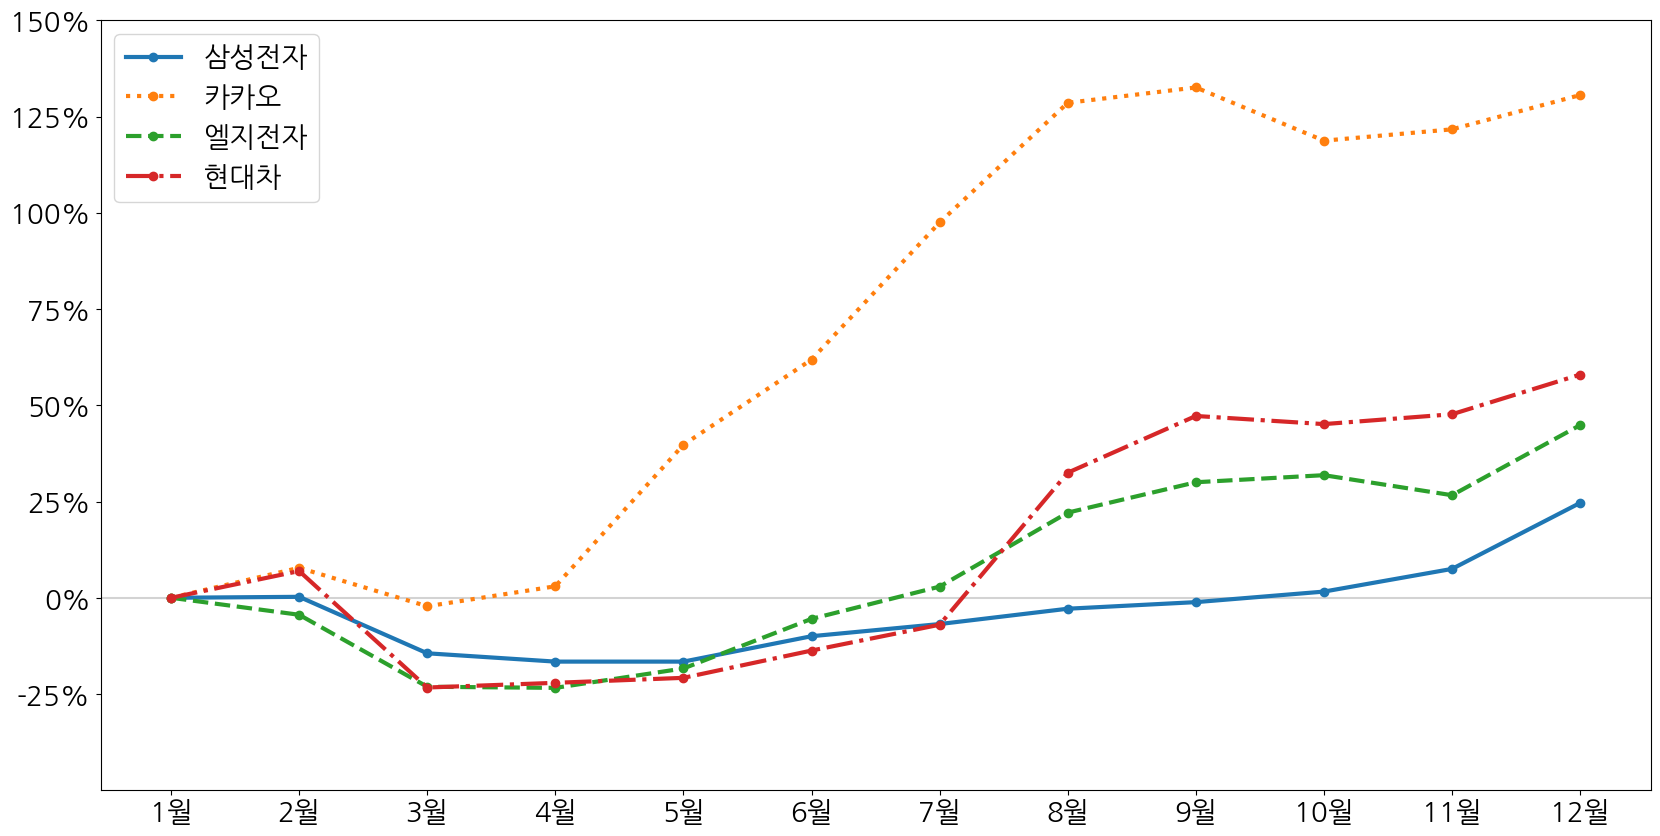

In [109]:
xticklabel = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(12))
ax.set_xticklabels(xticklabel)
display(fig)

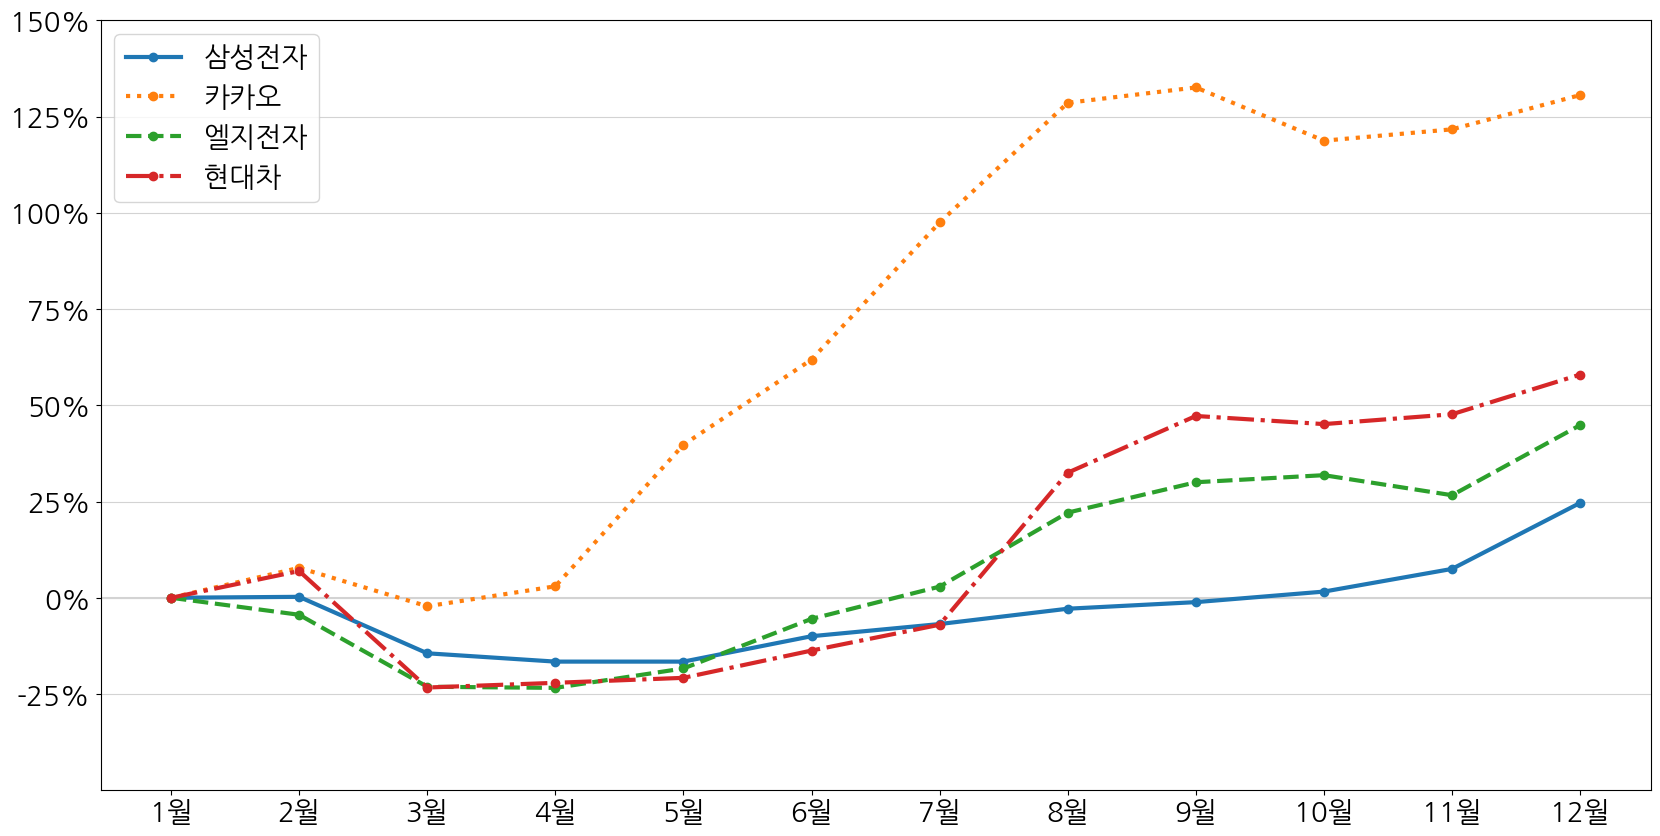

In [110]:
ax.grid(axis="y", c="lightgray")
display(fig)

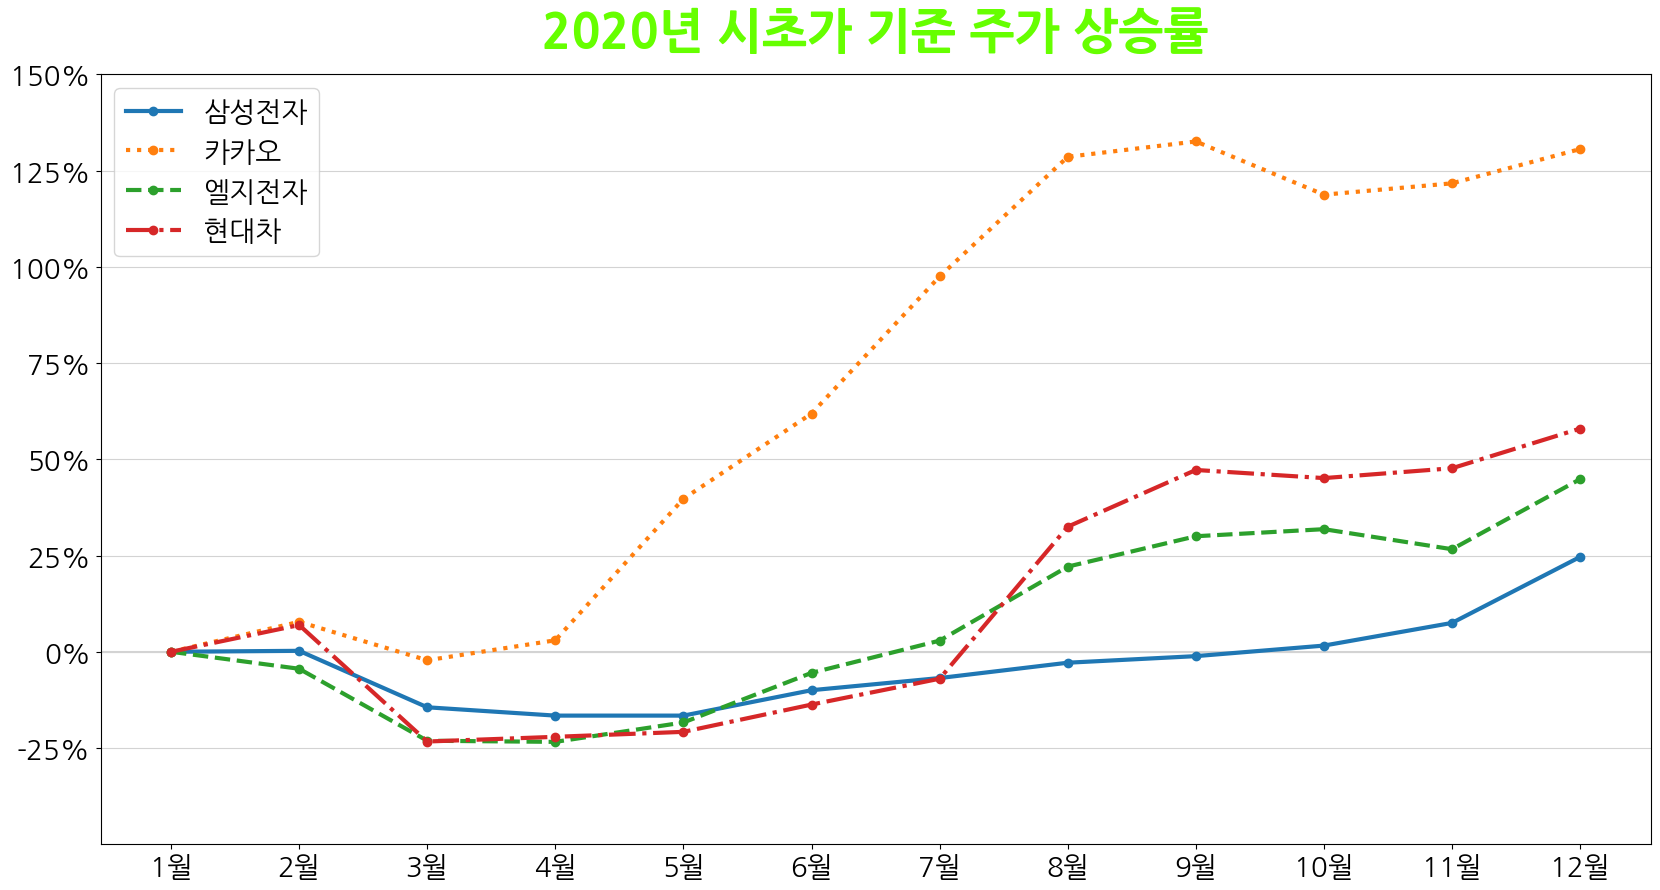

In [123]:
ax.set_title("2020년 시초가 기준 주가 상승률",
             fontweight="bold",
             fontsize="xx-large",
             color="#66ff00",
             pad=20)
display(fig)